In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import manifold
def standard_fig_save(save_path, file_name, file_format="png"):
    # don't need to set format
    fig_filename = os.path.join(save_path, file_name + '.' + file_format)
#     utils.makedirs(os.path.dirname(fig_filename))
    plt.savefig(fig_filename, dpi=500, bbox_inches='tight', transparent=False, pad_inches=0)
    plt.close()
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [2]:
maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 
        'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 
        'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [3]:
a = ['YC01_rel', 'YC02_rel', "DDH_left", "DDH_right"]
dataset = 0
name = a[dataset]
ori_path = r"D:\projects\Datasets\Original\{}.csv".format(name)

In [4]:
cor = np.loadtxt(fname=ori_path, delimiter=',', skiprows=1)[:, 0:3]
data = np.loadtxt(fname=ori_path, delimiter=',', skiprows=1)[:, 3:]
x = cor[:, 0]
y = cor[:, 1]
z = cor[:, 2]
cm = maps[0]

[]

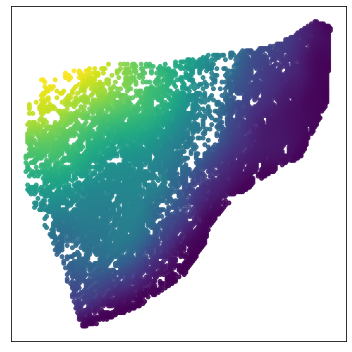

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
ax.scatter(x, y, s=15, c=z, marker='o', cmap=cm, alpha=0.9)
ax.set_xticks([])
ax.set_yticks([])
# standard_fig_save(save_path="results/2d", file_name="2d_origin", file_format="png")

In [42]:
# 将全部都画出来，需要时间3min
for name in a:
    ori_path = r"D:\projects\Datasets\Original\{}.csv".format(name)
    cor = np.loadtxt(fname=ori_path, delimiter=',', skiprows=1)[:, 0:3]
    data = np.loadtxt(fname=ori_path, delimiter=',', skiprows=1)[:, 3:]
    x = cor[:, 0]
    y = cor[:, 1]
    z = cor[:, 2]
    cm = maps[0]
    for date in range(data.shape[1]):
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
        ax.scatter(x, y, s=15, c=data[:, date], marker='o', cmap=cm)
        ax.set_xticks([])
        ax.set_yticks([])
        standard_fig_save(save_path=r"D:\projects\Datasets\Original\形变历史\{}_history".format(name), file_name="{}_{}".format(name, date), file_format="pdf")

In [6]:
def normed(train_data, normalization="max_min"):
    for i in [0]:
        h = train_data[:, i]
        if normalization == 'max_min':
            temp = (h - h.min()) / (h.max() - h.min())
        elif normalization == 'mean_std':
            temp = (h - np.mean(h)) / np.std(h)
        elif normalization == 'nrom':
            # s.t. h全是正数
            temp = h / np.sum(h)
        else:
            temp = h
        train_data[:, i] = temp
    return train_data

In [18]:
def scatter2hot(X, n, cmapid, date, dataset):
    # X 是输入的散点，前2是坐标，第三是值，n是其展示的粒度。转换到一个方阵中
    normalization = 'max_min'
    for i in [0, 1]:
        h = X[:, i]
        if normalization == 'max_min':
            temp = (h - h.min()) / (h.max() - h.min())
        X[:, i] = temp

    x_max = X[:, 0].max()
    x_min = X[:, 0].min()
    y_max = X[:, 1].max()
    y_min = X[:, 1].min()
    z_max = X[:, 2].max()
    z_min = X[:, 2].min()
    x_in = (x_max - x_min) / n
    y_in = (y_max - y_min) / n
    x_list = np.arange(x_min, x_max, x_in)
    y_list = np.arange(y_min, y_max, y_in)
    squre = np.empty((n, n), dtype=float)
    
    # 按设置的in筛选出某格的x
    for i in range(n):
        for j in range(n):
            temp = X
            temp = temp[x_list[i] < temp[:, 0]]
            if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
            temp = temp[y_list[j] < temp[:, 1]]
            if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]

            if temp.shape[0] == 0:
                # 用最小的z进行空白处的着色
                squre[i][j] = z_min
            else:
                squre[i][j] = temp[:, 2].mean()
    # 逆时针旋转90
    squre = np.rot90(squre, 1)

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    ax = plt.subplot()
    maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens',
            'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu',
            'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    im = ax.imshow(squre, cmap=maps[cmapid])
    ax.set_xticks([])
    ax.set_yticks([])
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax)
#     cb.set_label(fontdict=10)
    cb.ax.tick_params(labelsize=20)
    plt.savefig(r"D:\projects\Datasets\Original\形变历史\{}_hot\date{}_{}_{}.pdf".format(dataset, date, n, cmapid), quality=100, dpi=500, bbox_inches='tight',
                pad_inches=0)
    plt.close()

In [19]:
a = ['YC01_rel', 'YC02_rel', "DDH_left", "DDH_right"]
dataset = 1
name = a[dataset]
ori_path = r"D:\projects\Datasets\Original\{}.csv".format(name)

In [20]:
cor = np.loadtxt(fname=ori_path, delimiter=',', skiprows=1)[:, 0:3]
data = np.loadtxt(fname=ori_path, delimiter=',', skiprows=1)[:, 3:]
x = cor[:, 0]
y = cor[:, 1]
z = cor[:, 2]
cm = maps[0]

In [21]:
# 选出较好的日期
temp = cor
for date in range(data.shape[1]):
    temp[:, 2] = data[:, date]
    scatter2hot(temp, 25, 13, date, name)

E:\ProgramData\Anaconda3\envs\ManifoldFlow\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


E:\ProgramData\Anaconda3\envs\ManifoldFlow\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


KeyboardInterrupt: 

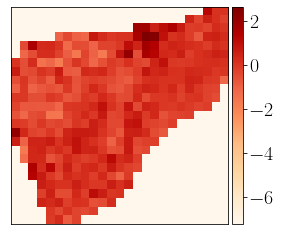

In [12]:
# 画全部
for name in a:
    ori_path = r"D:\projects\Datasets\Original\{}.csv".format(name)
    cor = np.loadtxt(fname=ori_path, delimiter=',', skiprows=1)[:, 0:3]
    data = np.loadtxt(fname=ori_path, delimiter=',', skiprows=1)[:, 3:]

    temp = cor
    for date in range(data.shape[1]):
        temp[:, 2] = data[:, date]
        scatter2hot(temp, 25, 13, date, name)